# METEHAN AYHAN - Predictive Maintenance Project

Bu proje, bir teslimat şirketi için tahmine dayalı bakım modelinin geliştirilmesini amaçlamaktadır. Projede, makine öğrenimi kullanarak ekipman arızalarını önceden tahmin edebilecek bir sınıflandırma modeli oluşturulacaktır.

<img src='https://visualfactories.com/wp-content/uploads/2019/09/Predictive-Maintenance-4.0-Data-Logger-CANopen.png' width='500'>

Data Dictionary:
- date: Cihazın durumu hakkında verilerin toplandığı tarih.
- device: Cihazın kimlik numarası veya kodu.
- failure: Cihazın o tarihte arıza yapıp yapmadığını gösteren etiket. 0, arıza yok; 1, arıza var.
- attribute1 - attribute9: Cihazın o tarihteki çeşitli özelliklerini veya sensör verilerini temsil eden sayısal değerler.

### Import Packet

In [5]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
pd.set_option("display.max_columns",55)

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [7]:
df=pd.read_csv('failure.csv')

In [8]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


### EDA - Exploratory Data Analysis

In [10]:
df.sample(5)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
69096,2015-04-11,S1F13K8E,0,134946808,0,0,0,12,221638,0,0,0
83158,2015-05-19,S1F0JGJV,0,65459400,0,0,0,8,254528,0,0,0
17940,2015-01-22,S1F0GCED,0,61652640,0,0,0,9,224380,0,0,0
75368,2015-04-28,S1F0S49E,0,157549216,0,0,6,8,272334,0,0,0
17958,2015-01-22,S1F0JD7P,0,186590712,0,0,0,58,241308,0,0,0


In [11]:
# Değerler arasında çok fazla fark var

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
failure,124494.0,8.514467e-04,2.916725e-02,0.0,0.0,0.0,0.0,1.0
attribute1,124494.0,1.223868e+08,7.045960e+07,0.0,61276754.0,122795744.0,183308370.0,244140480.0
attribute2,124494.0,1.594848e+02,2.179658e+03,0.0,0.0,0.0,0.0,64968.0
attribute3,124494.0,9.940455e+00,1.857473e+02,0.0,0.0,0.0,0.0,24929.0
attribute4,124494.0,1.741120e+00,2.290851e+01,0.0,0.0,0.0,0.0,1666.0
attribute5,124494.0,1.422269e+01,1.594302e+01,1.0,8.0,10.0,12.0,98.0
attribute6,124494.0,2.601729e+05,9.915101e+04,8.0,221452.0,249799.5,310266.0,689161.0
attribute7,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
attribute8,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
attribute9,124494.0,1.245152e+01,1.914256e+02,0.0,0.0,0.0,0.0,18701.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [14]:
# Date ve device object ve boş değer yok

In [15]:
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

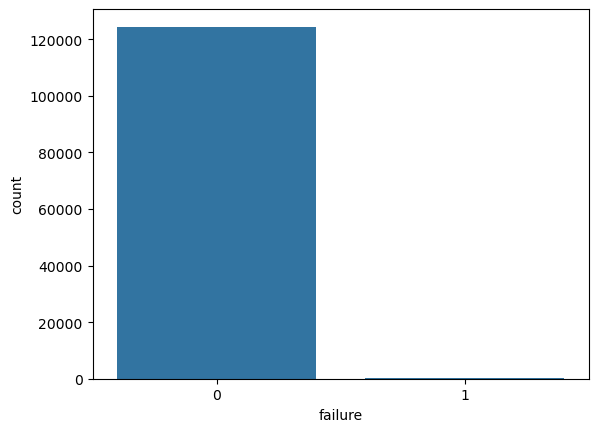

In [16]:
sns.countplot(x=df['failure']);

In [17]:
#veriye göre 124k çalışmamış 106 tanesi çalışmış.. Veriseti çok düzensiz..

Önce çoğunluk değer azaltılmalı daha sonra azınlık değer artırılmalı

### Data Preprocessing

In [20]:
#Önce tarih değerini düzeltelim

In [21]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [22]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [23]:
df = df.drop(columns=['date'])

In [24]:
df.head(2)

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
0,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,2015,1,1
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,2015,1,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   device      124494 non-null  object
 1   failure     124494 non-null  int64 
 2   attribute1  124494 non-null  int64 
 3   attribute2  124494 non-null  int64 
 4   attribute3  124494 non-null  int64 
 5   attribute4  124494 non-null  int64 
 6   attribute5  124494 non-null  int64 
 7   attribute6  124494 non-null  int64 
 8   attribute7  124494 non-null  int64 
 9   attribute8  124494 non-null  int64 
 10  attribute9  124494 non-null  int64 
 11  year        124494 non-null  int32 
 12  month       124494 non-null  int32 
 13  day         124494 non-null  int32 
dtypes: int32(3), int64(10), object(1)
memory usage: 11.9+ MB


In [26]:
df['device_initial'] = df['device'].str[0] #cihaz kodlarının ilk harflerini aldık..
df = pd.get_dummies(df, columns=['device_initial'])
df = df.drop(columns=['device'])

In [27]:
df.sample(5)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day,device_initial_S,device_initial_W,device_initial_Z
111942,0,54766560,0,0,0,11,498237,0,0,0,2015,8,10,False,False,True
57690,0,114488096,0,0,0,8,309261,0,0,0,2015,3,20,False,True,False
52137,0,143390320,0,0,0,9,222683,0,0,0,2015,3,12,True,False,False
8854,0,106060584,0,0,0,7,271344,0,0,120,2015,1,9,False,True,False
51113,0,60610832,0,0,0,10,425716,0,0,0,2015,3,10,False,True,False


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   failure           124494 non-null  int64
 1   attribute1        124494 non-null  int64
 2   attribute2        124494 non-null  int64
 3   attribute3        124494 non-null  int64
 4   attribute4        124494 non-null  int64
 5   attribute5        124494 non-null  int64
 6   attribute6        124494 non-null  int64
 7   attribute7        124494 non-null  int64
 8   attribute8        124494 non-null  int64
 9   attribute9        124494 non-null  int64
 10  year              124494 non-null  int32
 11  month             124494 non-null  int32
 12  day               124494 non-null  int32
 13  device_initial_S  124494 non-null  bool 
 14  device_initial_W  124494 non-null  bool 
 15  device_initial_Z  124494 non-null  bool 
dtypes: bool(3), int32(3), int64(10)
memory usage: 11.3 MB


### Smote

In [30]:
x = df.drop(columns=['failure'])
y = df['failure']

In [31]:
oversample = SMOTE(random_state=42)
x, y = oversample.fit_resample(x, y)


In [32]:
y.value_counts()

failure
0    124388
1    124388
Name: count, dtype: int64

### Modelling

In [34]:
# Önce Best Modeli bulalım

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def find_best_classifier(x, y):
    # Veri setini eğitim ve test olarak ayırma
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Veriyi ölçeklendirme
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    # Kullanılacak modeller
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier()
    }
    
    best_score = 0
    best_model = None
    
    # Her modelin doğruluğunu hesaplama
    for name, clf in classifiers.items():
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")
        
        if accuracy > best_score:
            best_score = accuracy
            best_model = clf
    
    print(f"\nBest Model: {best_model.__class__.__name__} with Accuracy: {best_score:.4f}")
    return best_model

In [36]:
#best_model = find_best_classifier(x, y)

In [37]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
model.fit(x_train,y_train)
tahmin=model.predict(x_test)

In [40]:
accuracy_score(tahmin,y_test)

0.9995980384275264

In [41]:
from sklearn.metrics import confusion_matrix, roc_auc_score

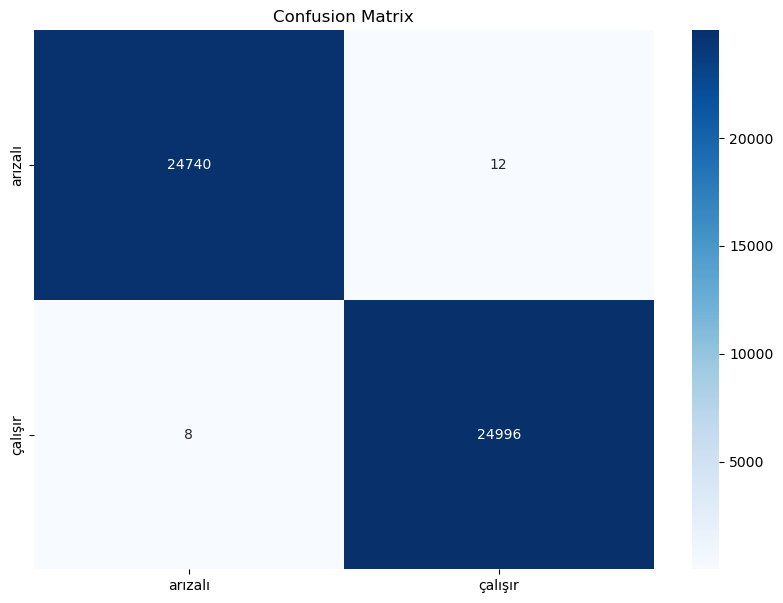

In [42]:
cm = confusion_matrix(y_test, tahmin)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['arızalı', 'çalışır'], 
            yticklabels=['arızalı', 'çalışır'])
plt.title('Confusion Matrix')
plt.show()

### Result

RandomForestClassifier ile ekipman arızalarını önceden tahmin edebilecek %99 oranında başarı gösteren bir sınıflandırma modeli oluşturulmuştur. Dengesiz veri setleriyle başa çıkmak için SMOTE tekniği kullanılarak veri seti dengelenmiş ve bu sayede modelin performansı artırılmıştır.